In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

In [4]:
mapping_df = pd.read_csv("mapping.csv",encoding="ISO-8859-1")
mapping_df
companies_df = pd.read_csv("companies_d.csv",encoding="ISO-8859-1")
companies_df
round2_df = pd.read_csv("rounds2.csv",encoding="ISO-8859-1") 
round2_df

# Upper case to MERGE
# Uppercase the Permalink of both Files
companies_df['company_permalink'] = companies_df['company_permalink'].str.upper()
round2_df['company_permalink'] = round2_df['company_permalink'].str.upper()
companies_df

# Merging the both files
master_fr = pd.merge(round2_df,companies_df,on="company_permalink",how='outer')
master_fr

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114966,/ORGANIZATION/COP?-ACTIVE-LTD,NaN,NaN,NaN,NaN,NaN,Copé Active Ltd.,http://www.copeactive.com/,Active Lifestyle|E-Commerce|Health and Wellnes...,operating,GBR,H9,London,London,01-01-2015
114967,/ORGANIZATION/CR?ME-CISEAUX,NaN,NaN,NaN,NaN,NaN,Crème & Ciseaux,https://creme-ciseaux.com/,NaN,closed,NaN,NaN,NaN,NaN,04-09-2013
114968,/ORGANIZATION/DESAF?O-T?CTICO,NaN,NaN,NaN,NaN,NaN,Desafío Táctico,http://desafiotactico.260mb.org/,NaN,operating,NaN,NaN,NaN,NaN,NaN
114969,/ORGANIZATION/E-C?BICA,NaN,NaN,NaN,NaN,NaN,E CÚBICA,NaN,NaN,operating,NaN,NaN,NaN,NaN,NaN


In [3]:
# Considering that Spark Funds wants to invest between 5 to 15 million USD per investment round,
# which investment type is the most suitable for it? Identify the investment type and, for further analysis,
# filter the data so it only contains the chosen investment type.

# Great! You have crossed two checkpoints. There are four checkpoints left now.

In [6]:
master_fr['raised_amount_usd'] = master_fr['raised_amount_usd'].fillna(0)
master_fr
itype_df = master_fr.query('raised_amount_usd>5000000 & raised_amount_usd<15000000')
itype_df

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
12,/ORGANIZATION/0XDATA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
21,/ORGANIZATION/1-800-PUBLICRELATIONS-INC-,/funding-round/11c228f58831bc7ed337ef69ecc560c2,private_equity,NaN,01-02-2015,6000000.0,"1-800-PublicRelations, Inc.",http://www.1800publicrelations.com,Internet Marketing|Media|Public Relations,operating,USA,NY,New York City,New York,24-10-2013
46,/ORGANIZATION/1001-MENUS,/funding-round/645b4cd895450b8e0268027cd7813047,venture,B,04-11-2015,6602694.0,ZenChef,http://zenchef.com/en/,Local Businesses|Restaurants,operating,FRA,A8,Paris,Paris,20-11-2010
50,/ORGANIZATION/1001PHARMACIES-COM,/funding-round/a21fc4d20200f43e3a25fd9cfc7c1482,venture,A,09-07-2015,8900000.0,1001pharmacies.com,http://www.1001pharmacies.com/,Cosmetics|Marketplaces,operating,FRA,A9,Montpellier,Montpellier,01-01-2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114921,/ORGANIZATION/ZYOMYX-INC,/funding-round/85443f5438bfd50104b9591eabc95c94,grant,NaN,26-03-2014,7500000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114922,/ORGANIZATION/ZYOMYX-INC,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,NaN,11-07-2013,14219999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114930,/ORGANIZATION/ZYRAZ-TECHNOLOGY,/funding-round/c05aab2155e390066d51c6852ff61464,grant,NaN,11-09-2009,5400000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114931,/ORGANIZATION/ZYRAZ-TECHNOLOGY,/funding-round/e949f077c943db197f20e43c2eb8d0e6,venture,A,09-10-2009,7991547.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


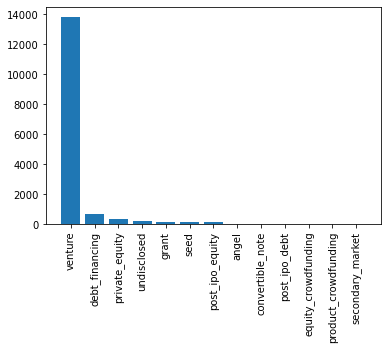

In [7]:
i_type = itype_df['funding_round_type'].value_counts()
# investment_type = i_type.to_frame()
# investment_type.reset_index(level=0, inplace=True)
# investment_type.rename(columns = {'index':'Investment_type','funding_round_type':'Count'}, inplace = True)
# investment_type
plt.bar(i_type.index,i_type.values)
plt.xticks(rotation=90)
plt.show()
# sns.countplot("funding_round_type",data=itype_df)
plt.show()

In [6]:
# Answer 5: as see from Above graph that maximum Funding_round_type is Venture
print("Ultimately,Acc to my Analysis You are Advised that most suitable type for Investment is ( Venture !! \nMake your decision and remember No one is forcing to invest in the Best one Type.. ")

Ultimately,Acc to my Analysis You are Advised that most suitable type for Investment is ( Venture !! 
Make your decision and remember No one is forcing to invest in the Best one Type.. 


In [7]:
filter1 = itype_df.query("funding_round_type=='venture' | funding_round_type=='debt_financing' | funding_round_type=='private_equity'| funding_round_type=='grant'| funding_round_type=='post_ipo_equity'")
filter1['funding_round_type'].value_counts()
filter1

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
12,/ORGANIZATION/0XDATA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
21,/ORGANIZATION/1-800-PUBLICRELATIONS-INC-,/funding-round/11c228f58831bc7ed337ef69ecc560c2,private_equity,NaN,01-02-2015,6000000.0,"1-800-PublicRelations, Inc.",http://www.1800publicrelations.com,Internet Marketing|Media|Public Relations,operating,USA,NY,New York City,New York,24-10-2013
46,/ORGANIZATION/1001-MENUS,/funding-round/645b4cd895450b8e0268027cd7813047,venture,B,04-11-2015,6602694.0,ZenChef,http://zenchef.com/en/,Local Businesses|Restaurants,operating,FRA,A8,Paris,Paris,20-11-2010
50,/ORGANIZATION/1001PHARMACIES-COM,/funding-round/a21fc4d20200f43e3a25fd9cfc7c1482,venture,A,09-07-2015,8900000.0,1001pharmacies.com,http://www.1001pharmacies.com/,Cosmetics|Marketplaces,operating,FRA,A9,Montpellier,Montpellier,01-01-2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114921,/ORGANIZATION/ZYOMYX-INC,/funding-round/85443f5438bfd50104b9591eabc95c94,grant,NaN,26-03-2014,7500000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114922,/ORGANIZATION/ZYOMYX-INC,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,NaN,11-07-2013,14219999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114930,/ORGANIZATION/ZYRAZ-TECHNOLOGY,/funding-round/c05aab2155e390066d51c6852ff61464,grant,NaN,11-09-2009,5400000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114931,/ORGANIZATION/ZYRAZ-TECHNOLOGY,/funding-round/e949f077c943db197f20e43c2eb8d0e6,venture,A,09-10-2009,7991547.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


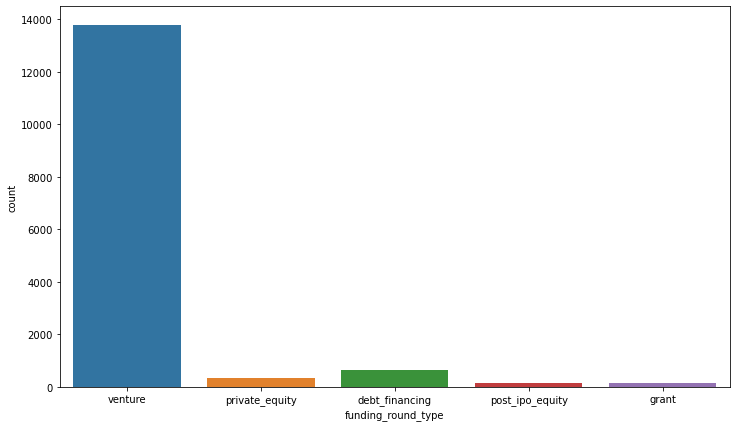

In [8]:
plt.figure(figsize=(12,7))
sns.countplot('funding_round_type',data=filter1)
plt.show()

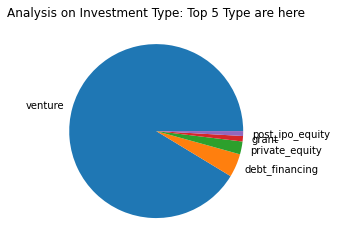

In [9]:
investin_f = ['venture','debt_financing','private_equity','grant','post_ipo_equity']
counts_f = counts = [13799,659,361,153,137]
plt.pie(counts_f,labels=investin_f)
plt.title("Analysis on Investment Type: Top 5 Type are here")
plt.show()

In [10]:
# Specify the country	Country analysis- countries most heavily invested in the past
filter1['country_code'].value_counts().head(10)

USA    3311
GBR     174
CHN     130
CAN     113
ISR      88
FRA      76
IND      67
DEU      61
SGP      26
IRL      24
Name: country_code, dtype: int64

In [11]:
# Filtering According to country
filter2 = filter1.query("country_code=='USA' | country_code=='GBR' | country_code=='CHN' | country_code=='CAN' | country_code=='ISR' | country_code=='FRA' | country_code=='IND' | country_code=='DEU' | country_code=='SGP' | country_code=='IRL' ")
filter2['country_code'].value_counts()
filter2

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
12,/ORGANIZATION/0XDATA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
21,/ORGANIZATION/1-800-PUBLICRELATIONS-INC-,/funding-round/11c228f58831bc7ed337ef69ecc560c2,private_equity,NaN,01-02-2015,6000000.0,"1-800-PublicRelations, Inc.",http://www.1800publicrelations.com,Internet Marketing|Media|Public Relations,operating,USA,NY,New York City,New York,24-10-2013
46,/ORGANIZATION/1001-MENUS,/funding-round/645b4cd895450b8e0268027cd7813047,venture,B,04-11-2015,6602694.0,ZenChef,http://zenchef.com/en/,Local Businesses|Restaurants,operating,FRA,A8,Paris,Paris,20-11-2010
50,/ORGANIZATION/1001PHARMACIES-COM,/funding-round/a21fc4d20200f43e3a25fd9cfc7c1482,venture,A,09-07-2015,8900000.0,1001pharmacies.com,http://www.1001pharmacies.com/,Cosmetics|Marketplaces,operating,FRA,A9,Montpellier,Montpellier,01-01-2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32076,/ORGANIZATION/ENOCEAN,/funding-round/f298581be2bdc2b959325a1e62af4ee6,venture,NaN,15-12-2009,11632800.0,EnOcean,http://www.enocean.com,Mobile|Wireless,operating,DEU,2,Oberhaching,Oberhaching,01-01-2001
32085,/ORGANIZATION/ENOVA-SYSTEMS,/funding-round/540b8429d00b0a6ebb558f50fd989d71,venture,NaN,23-12-2009,9024960.0,Enova Systems,http://www.enovasystems.com,Clean Technology,operating,USA,CA,Los Angeles,Torrance,NaN
32088,/ORGANIZATION/ENOVANCE,/funding-round/3a03f8b1deedf1a15935b0e28905d456,debt_financing,NaN,09-07-2013,7699316.0,eNovance,http://enovance.com/en,Cloud Computing|Open Source|Software,acquired,FRA,A8,Paris,Paris,01-01-2008
32096,/ORGANIZATION/ENPHASE-ENERGY,/funding-round/be2a7f8b21fb8b492c71fe1bdd650aa1,venture,NaN,24-06-2011,14000000.0,Enphase Energy,http://www.enphaseenergy.com,Clean Technology|Semiconductors,ipo,USA,CA,Napa Valley,Petaluma,01-01-2006


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


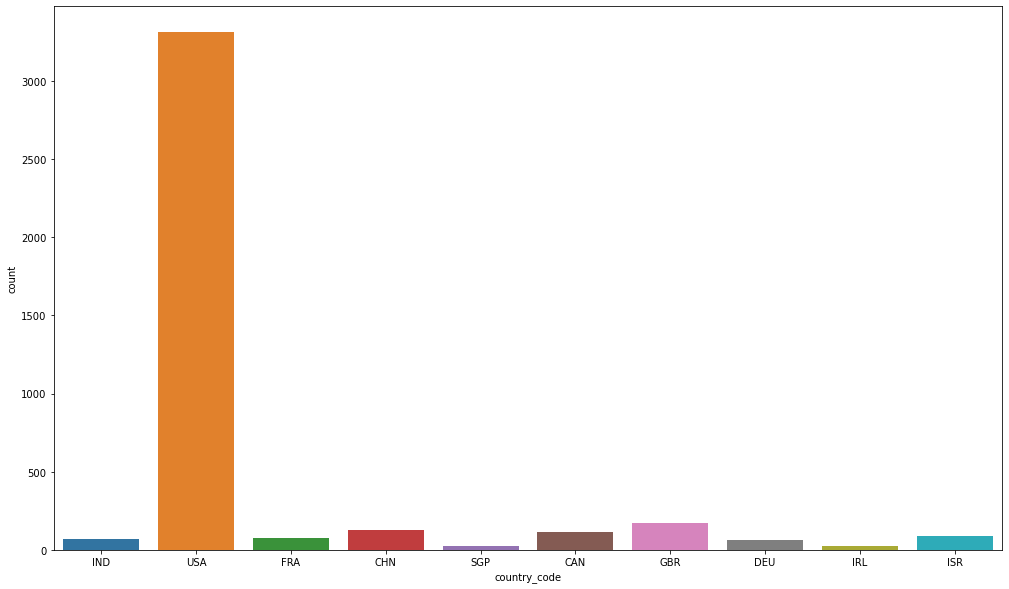

In [12]:
plt.figure(figsize=(17,10))
sns.countplot('country_code',data=filter2)
plt.show()

In [13]:
# Answer : From above graph it is clear that USA is topmost country Where All Companies Invest
print("These are Top 10 Countries from my analysis !!")

These are Top 10 Countries from my analysis !!


In [14]:
# 7.	Sector analysis- understanding the distribution of investments across the eight main sectors
top_sectors = filter2['category_list'].value_counts().head(10)
top_sectors = top_sectors.to_frame()
top_sectors.reset_index(level=0,inplace=True)
top_sectors.rename(columns ={'index':'Sectors_category','category_list':'No. of Companies Invested in this Sector'},inplace=True)
top_sectors

,Sectors_category,No. of Companies Invested in this Sector
0,Biotechnology,558
1,Software,298
2,Health Care,150
3,Enterprise Software,121
4,Clean Technology,110
5,Semiconductors,103
6,Mobile,91
7,Hardware + Software,87
8,Advertising,76
9,Security,72


In [15]:
print("These are top 10 sectors according my analysis These will be profitable !!")

These are top 10 sectors according my analysis These will be profitable !!


<AxesSubplot:title={'center':'Sector Analysis to make best Investment for a Company'}, xlabel='Sectors_category', ylabel='No. of Companies Invested in this Sector'>

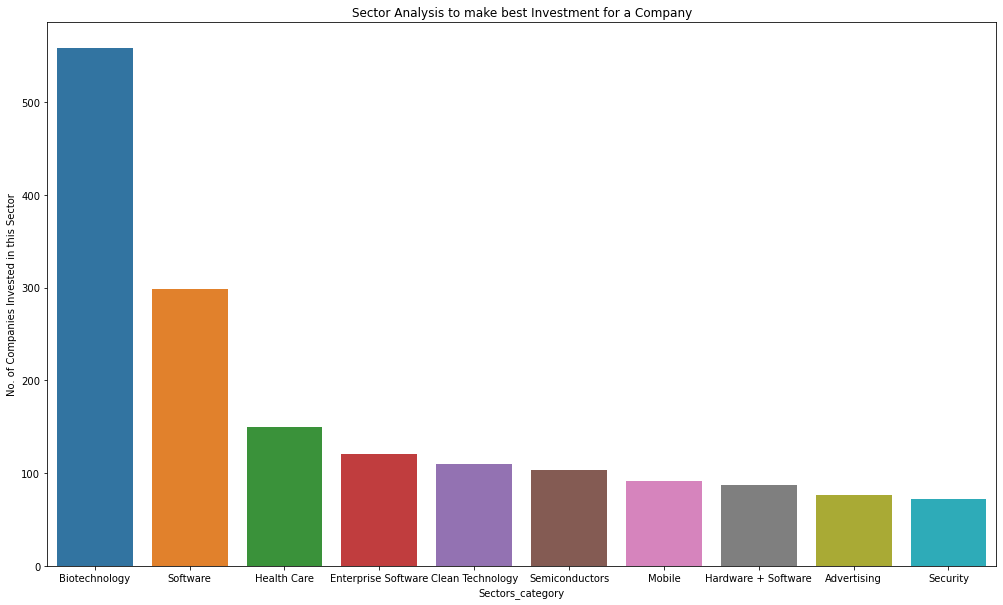

In [16]:

plt.figure(figsize=(17,10))
plt.title("Sector Analysis to make best Investment for a Company")
sns.barplot(x='Sectors_category',y='No. of Companies Invested in this Sector',data=top_sectors)
